In [1]:
import numpy as np
import pandas as pd


N_dimension = 2
N_class = 3
N_points = 100

R = 20
phi = 2 * np.pi / N_class

mu_list = [[R * np.cos(phi * index) for index in range(N_class)], [R * np.sin(phi * index) for index in range(N_class)]]
sigma_list = [[index + 1 for index in range(N_class)], [2 * (index + 1) for index in range(N_class)]]

xy = np.array([[np.random.randn(N_points) * sigma + mu for sigma, mu in zip(sigma_list[index], mu_list[index])] for index in range(N_dimension)])
X = xy.reshape([2, 300]).T



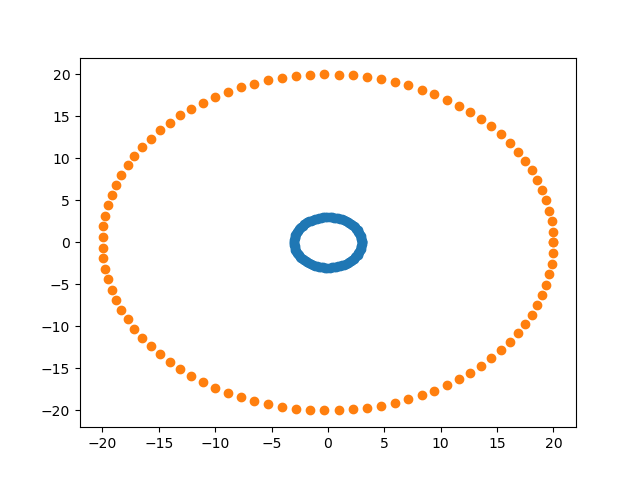

In [38]:
import numpy as np


R1 = 3
R2 = 20
phi = np.linspace(0, 1, 100) * 2 * np.pi
sigma = 0

X1 = np.stack([R1 * np.cos(phi), R1 * np.sin(phi)], axis=1) + np.random.randn(phi.size, 2) * sigma
X2 = np.stack([R2 * np.cos(phi), R2 * np.sin(phi)], axis=1) + np.random.randn(phi.size, 2) * sigma
X = np.concatenate([X1, X2], axis=0)

import seaborn as sns
from matplotlib import pyplot as plt

plt.figure()
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])

%matplotlib widget
plt.show()

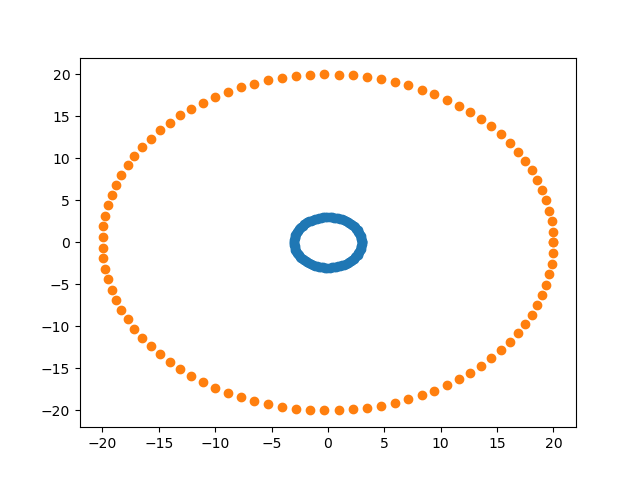

In [39]:
class DBScan:

    def __init__(self, epsilon=20, min_epsilon_points=3):
        self.epsilon = epsilon
        self.min_epsilon_points = min_epsilon_points
        self.cluster_indices_list = []
        self.noise_point_indices = []
    
    def fit(self, X):
        unvisited_point_indices = list(range(X.shape[0]))
        unclustered_point_indices = list(range(X.shape[0]))
        while unvisited_point_indices:
            point_index = unvisited_point_indices.pop(0)
            epsilon_point_indices = self._get_epsilon_point_indices(X, point_index)
            if len(epsilon_point_indices) < self.min_epsilon_points:
                self.noise_point_indices.append(point_index)
            else:
                cluster_indices = []
                self.cluster_indices_list.append(cluster_indices)
                cluster_indices.append(point_index)
                cluster_iteration_indices = []
                cluster_iteration_indices.extend(epsilon_point_indices)
                cluster_iteration_index = 0
                while cluster_iteration_index < len(cluster_iteration_indices):
                    cluster_index = cluster_iteration_indices[cluster_iteration_index]
                    if cluster_index in unvisited_point_indices:
                        unvisited_point_indices.remove(cluster_index)
                        sub_epsilon_point_indices = self._get_epsilon_point_indices(X, cluster_index)
                        if len(sub_epsilon_point_indices) >= self.min_epsilon_points:
                            cluster_iteration_indices.extend(sub_epsilon_point_indices)
                        if cluster_index in unclustered_point_indices:
                            cluster_indices.append(cluster_index)
                            unclustered_point_indices.remove(cluster_index)
                            if cluster_index in self.noise_point_indices:
                                self.noise_point_indices.remove(cluster_index)
                    cluster_iteration_index = cluster_iteration_index + 1

    def _get_epsilon_point_indices(self, X, point_index):
        epsilon_point_indices = []
        for epsilon_index in range(X.shape[0]):
            if np.sum((X[point_index] - X[epsilon_index, :])**2) < self.epsilon:
                epsilon_point_indices.append(epsilon_index)
        return epsilon_point_indices
    

db_scan = DBScan()
db_scan.fit(X)

import seaborn as sns
from matplotlib import pyplot as plt


plt.figure()
for cluster_indices in db_scan.cluster_indices_list:
    plt.scatter(X[cluster_indices, 0], X[cluster_indices, 1])

plt.scatter(X[db_scan.noise_point_indices, 0], X[db_scan.noise_point_indices, 1], marker="+")

%matplotlib widget
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

db_scan = DBSCAN(eps=5, min_samples=3)
clusters = db_scan.fit_predict(X)

print(clusters)

import seaborn as sns
from matplotlib import pyplot as plt


plt.figure()
for index in range(k):
    plt.scatter(X[k_indices==index, 0], X[k_indices==index, 1])

%matplotlib widget
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
